# Assessment 2: Exploratory Data Analysis and Data Cleansing
## Name : Vipul Jad
## Id : 29520762


## Importing Libraries.
- Pandas is imported as pandas
- imported CSV for additional CSV functions
- Imported Regular Expressions
- Imported DateTime for cleaning date and time data
- Imported matplitlib as plt for plotting the graphs

In [1]:
import pandas as pa 
import csv
import re
import datetime 
import matplotlib as mpl
import matplotlib.pylab as pyl
import matplotlib.pyplot as plt
from IPython.display import Image


## Importing the csv file into a Data Frame  and Viewing it.
- using the read.csv() function importing the dataframe

In [2]:
df=pa.DataFrame()
df=pa.read_csv("29520762.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 16 columns):
Id                       35363 non-null object
Drone Type               35378 non-null float64
Post Type                35368 non-null float64
Package Weight           35388 non-null float64
Origin Region            35378 non-null float64
Destination Region       35378 non-null float64
Origin Latitude          35388 non-null float64
Origin Longitude         35388 non-null float64
Destination Latitude     35388 non-null float64
Destination Longitude    35388 non-null float64
Journey Distance         35388 non-null float64
Departure Date           35388 non-null object
Departure Time           35388 non-null object
Travel Time              35348 non-null float64
Delivery Time            35388 non-null object
Delivery Fare            35358 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.3+ MB


### Analysing the latitudes and longitudes (Origin and Destination)
- Describing each column.

In [3]:
print(df['Origin Latitude'].describe())
print(df['Destination Latitude'].describe())
print(df['Origin Longitude'].describe())
print(df['Destination Longitude'].describe())

count    35388.000000
mean       -37.688710
std          1.937595
min        -39.006823
25%        -38.420234
50%        -37.678353
75%        -37.082438
max         38.399019
Name: Origin Latitude, dtype: float64
count    35388.000000
mean       -37.677912
std          1.945753
min        -39.006823
25%        -38.410415
50%        -37.667249
75%        -37.069625
max         38.898171
Name: Destination Latitude, dtype: float64
count    35388.000000
mean       145.399800
std          7.112457
min       -147.663155
25%        143.996850
50%        145.536621
75%        146.941995
max        148.450877
Name: Origin Longitude, dtype: float64
count    35388.000000
mean       145.411825
std          7.124517
min       -148.232657
25%        144.018537
50%        145.552299
75%        146.953927
max        148.450877
Name: Destination Longitude, dtype: float64


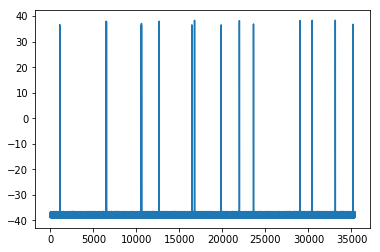

In [4]:
df['Origin Latitude'].plot()
#df.boxplot(column='Origin Latitude',by='Id',figsize=(15,10),fontsize=20 )

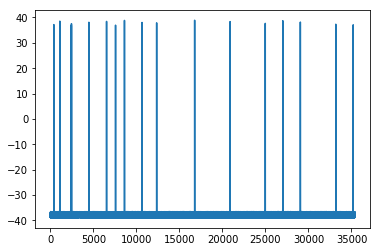

In [5]:
df['Destination Latitude'].plot()

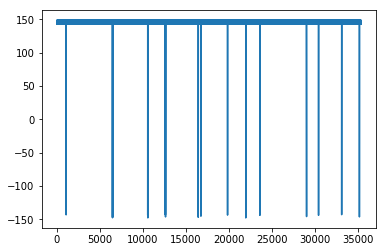

In [6]:
df['Origin Longitude'].plot()


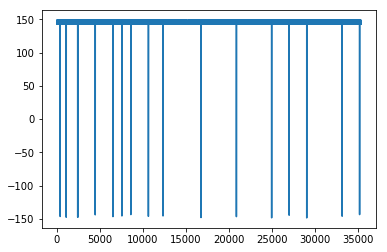

In [7]:

df['Destination Longitude'].plot(by=df.Id)

- From the above graphical representation we can deduce that the latitude has many positive values which needs to be converted to negative values as Victoria,Australia is below the equator. 
- Similarly the longitudes has many positive values which needs to be corrected as Victoria is on the east of the globe.
- (assuming the mistake is only done to the signs of the data while entering the data).

- below is the TABLEAU representation of the latitudes and longitudes including the regions
- as we can see the problems in plotting the coordinates 
- because of sign variation the coordinates are shown outside Victoria.

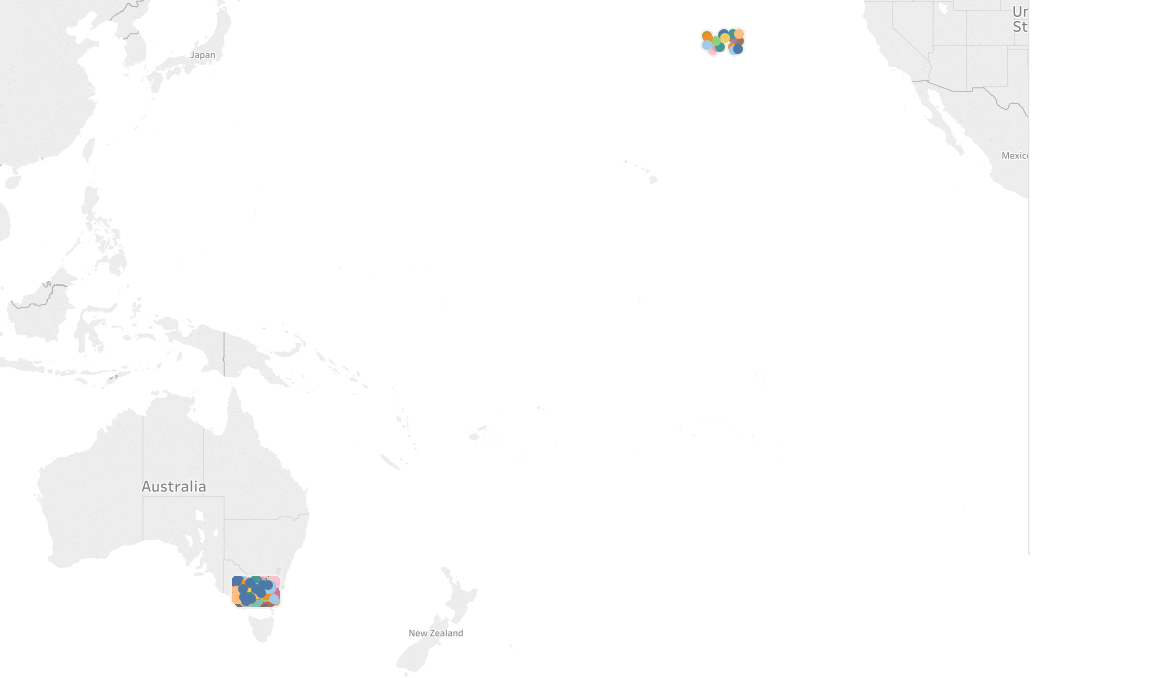

In [8]:
nelat=[]
count= 0
for m in df['Origin Latitude']:
    if m >= 0.0:
        m=m*(-1)
        count+=1
    nelat.append(round(m,7))
print("corrected origin latitudes:",count)    
df['Origin Latitude']= nelat
count=0
nelatt=[]
for m in df['Destination Latitude']:
    if m >= 0.0:
        m=m*(-1)
        count+=1
    nelatt.append(round(m,7)) 
print("corrected destination latitudes:",count)  
df['Destination Latitude']= nelatt
nelong=[]
count=0
for m in df['Origin Longitude']:
    if m <= 0.0:
        m=m*(-1)
        count+=1
    nelong.append(round(m,7))
print("corrected origin longitudes:",count)     
df['Origin Longitude']=nelong   
nelongg=[]
count=0
for m in df['Destination Longitude']:
    if m <= 0.0:
        m=m*(-1)
        count+=1
    nelongg.append(round(m,7))
print("corrected destination longitudes:",count)
df['Destination Longitude']=nelongg 

corrected origin latitudes: 20
corrected destination latitudes: 20
corrected origin longitudes: 20
corrected destination longitudes: 20


## Post Type
- On visually analysing the dataset using CHARTIO . i came to the conclusion that the Post Type column is dependent on the ID of the drones as follows
- the ID which starts with the number 1 has post type 0.0 and 
- the ID which starts with the number 5 has post type 1.0
- the following code dtects the total number of null values and the correcponding post types mistakes

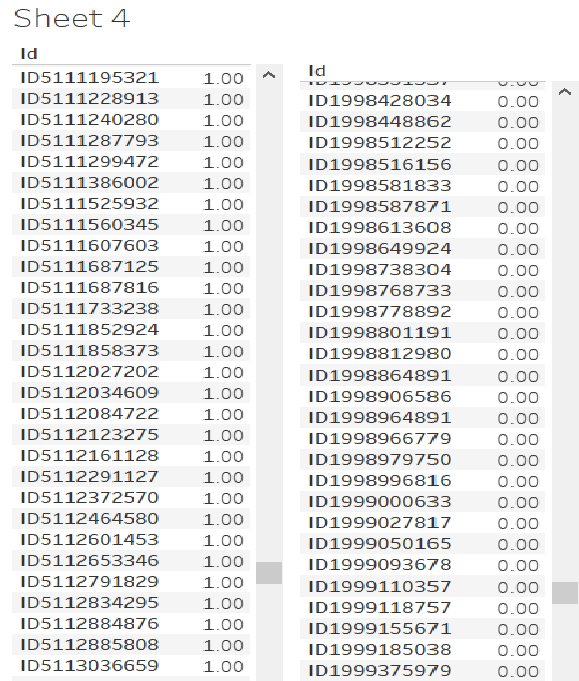

In [9]:
count=0
for i in range(0,len(df["Post Type"])):
    if pa.isna(df["Post Type"][i]):
        count+=1
    if df["Post Type"][i]>=9:
        if df.Id[i][3]!='1' and df["Post Type"][i] != 0.0:
            count+=1
        elif df.iloc[i,0][3]!='5' and df["Post Type"][i] != 1.0: 
            count+=1

In [10]:
count

20

#### on evaluating we detected 20 errors in the column
- correcting the detected mistakes in the database

In [11]:
for i in range(0,len(df["Post Type"])):
    if pa.isna(df["Post Type"][i]):
        if df.iloc[i,0][3]=='1':
            df["Post Type"][i]=0.0
        elif df.iloc[i,0][3]=='5':
            df["Post Type"][i]=1.0
for i in range ( 0 , len (df.Id)):
    if not pa.isna(df['Id'][i]):
        if df['Id'][i][2]=='1':
            if df["Post Type"][i]==1.0:
                df["Post Type"][i]=0.0
        elif df['Id'][i][2]=='5':
            if df['Post Type'][i]==0.0:
                df['Post Type'][i]=1.0
count = 1
for i in range ( 0 , len (df.Id)-1):
    count+=1
    if pa.isna(df['Post Type'][i]):
        if str(df['Id'][i][2])=='1':
            df["Post Type"][i]=0.0
        elif str(df['Id'][i][2])=='5':
            df["Post Type"][i]=1.0
#print(count)            
#len(df.Id)                        

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is tr

- again checking for errors 

In [12]:
count=0
for i in range(0,len(df["Post Type"])):
    if pa.isna(df["Post Type"][i]):
        count+=1
    if df["Post Type"][i]>=9:
        if df.Id[i][3]!='1' and df["Post Type"][i] != 0.0:
            count+=1
        elif df.iloc[i,0][3]!='5' and df["Post Type"][i] != 1.0: 
            count+=1
count            

0

### The Post Type column is corrected.

### Checking the Departure Date column


In [13]:
df["Departure Date"].describe()

count          35388
unique           272
top       2018-07-08
freq             217
Name: Departure Date, dtype: object

- used pandas.datetime to check if the dates in the column are correctly written which reported an error . which states that the dates are not in well written format and there are some minor mistakes
### Assumptions
- if the month seems greater than 12 swapping it with the day , as there could be a writing mistake while data entry
- checking the feb month should not have more than 28 days , and if there are then increasing the month by 1 ie March.
- the months like April ,June ,September and November should not have more than 30 days if there are then month is increamented and the day is set to the first of respective increamented month as there could be a mistakes while entring the data the user may not remember the days limit of the month.

In [14]:
#departure date 
vc=0
invc=0
dateli=[]
count=0
#df['Departure Date']=pa.to_datetime(df['Departure Date'])
for m in df['Departure Date']:
    if re.search(r'\d\d\d\d-\d\d-\d\d',m):
        vc+=1
        year=re.search(r'(\d\d\d\d)-\d\d-\d\d',m).group(1)
        month=re.search(r'\d\d\d\d-(\d\d)-\d\d',m).group(1)
        day= re.search(r'\d\d\d\d-\d\d-(\d\d)',m).group(1)
        if int(month) > 12:
            temp=month
            month=day
            day=temp
            count+=1
            #print('md')
        elif int(month) == 2 and int(day)> 28 :
            month = '03'
            count+=1
            #print('feb')
        #print(date)
        elif month in ['04','06','09','11'] and int(day)>30:
            #print(m)
            count+=1
            x=month
            x=int(x)
            x+=1
            month='0'+str(x)
            day='01'
            #print(day+month)
            
        date = year+"-"+month+"-"+day    
    else :
        invc+=1
        
    dateli.append(date)
df['Departure Date']=dateli
count

214

- From the above calculations we corrected 214 dates and appended into a list.
- now using the to_datetime function of pandas to check weather the dates are correct.

In [15]:
#df['Departure Date']=pa.to_datetime(df['Departure Date'], format = "%Y-%m-%d")

- As the above code is executed we successfully corrected every date in the column
- reverting the default datatype

In [16]:
#df['Departure Date'] = df['Departure Date'].astype(object)
#df['Departure Date'].unique()


### The Journey Distance column
- The journey distance can be calculated using the origin and destination latitude-longitudes.
- The distance was calculated using the formula given in the following website https://andrew.hedges.name/experiments/haversine/
- concidering the radious of earth as 6378 km 

In [17]:
df["Journey Distance"].describe()

count    35388.000000
mean       213.510961
std        111.830289
min          0.149000
25%        127.242000
50%        201.267000
75%        286.288250
max        552.916000
Name: Journey Distance, dtype: float64

In [18]:
from math import sin, cos, sqrt, atan2, radians
dl=[]
# approximate radius of earth in km
R = 6378
for i in range(0,len(df.Id)):
    lat1 = radians(df.iloc[i,6])
    lon1 = radians(df.iloc[i,7])
    lat2 = radians(df.iloc[i,8])
    lon2 = radians(df.iloc[i,9])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = round((R * c),3)
    dl.append(distance)
    #print("Result:", distance)


- calculating the corresponding distance using the latitudes and longitudes
- compairing the accuired list with the data in our dataframe by rounding it to 3 decimal places.
- replacing the wrongly entered data

In [19]:
c=0
for i in range (0,len(df.Id)):
    if round(df.iloc[i,10],3)!=dl[i]:
        #print(str(i)+'-'+str(round(df.iloc[i,10],3))+'-'+str(dl[i]))
        df.iloc[i,10]=dl[i]
        c+=1
c

15

- we found 15 mistakes in the given dataset and corrected them

### Origin Region and Destination Region 
- The origin region and destination region are clustered according to the nearest latitudes and longitudes
- The mean of the region is the centroid latitude longitude
- I used the k Nearest Neighbours clustering algorithm to determine the given regions are correctly determined 

- checking the details of each column 

In [20]:
df["Origin Region"].describe()

count    35378.000000
mean        24.013907
std         13.567380
min          1.000000
25%         12.000000
50%         24.000000
75%         36.000000
max         47.000000
Name: Origin Region, dtype: float64

In [21]:
df["Destination Region"].describe()

count    35378.000000
mean        23.984001
std         13.563029
min          1.000000
25%         12.000000
50%         24.000000
75%         36.000000
max         47.000000
Name: Destination Region, dtype: float64

- From above eploration we colclude 

- Using the n KNN clustering algorithm on the basis of origin latitude,longitude , with respect to origin region. 
- similarly doing the KNN clustering with the Destination region.
- source(www.stackoverflow.com)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
ndf=df[(df["Origin Region"].isna() == False)]
f1=ndf[["Origin Latitude","Origin Longitude"]]
f2=ndf["Origin Region"]
f2.values.reshape(-1,1)
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df[["Origin Latitude","Origin Longitude"]])
cw=0
for i in df.index:
    #print(1)
    #print(df.iloc[i]["Predicted"])
    #print(df.iloc[i]['Origin Region'])
    if p[i] != df.iloc[i]['Origin Region']:
        df.at[i,"Origin Region"]= p[i]
        #print(df.iloc[i]["Origin Region"],p[i])
        cw+=1
        
print("corrections in Origin Region",cw)      

corrections in Origin Region 30


In [23]:
from sklearn.neighbors import KNeighborsClassifier
ndf=df[(df["Destination Region"].isna() == False)]
f1=ndf[["Destination Latitude","Destination Longitude"]]
f2=ndf["Destination Region"]
f2.values.reshape(-1,1)
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df[["Destination Latitude","Destination Longitude"]])
cw=0
for i in df.index:
    #print(1)
    #print(df.iloc[i]["Predicted"])
    #print(df.iloc[i]['Destination Region'])
    if p[i] != df.iloc[i]['Destination Region']:
        #print(df.iloc[i]["Destination Region"],p[i])
        df.at[i,"Destination Region"]= p[i]
        #print(df.iloc[i]["Destination Region"],p[i])
        cw+=1
        
print("corrections in Destination Region",cw) 

corrections in Destination Region 29


- The corrected values in Origin Region are 30 and Destination Region are 29 . which may me nan values or errors while entering the database.

### Travel Time and Delivery Time 

- checking for null values in Travel Time 

In [24]:
nc=0
x = []
for i in range (len(df.Id)):
    if pa.isna(df["Travel Time"][i]):
        nc+=1
        x.append(i)
nc

40

- Assuming the Departure Time to be  correct entity we can calculate the Travel Time by subrtacting the Departure Time and Delivery Time
- created a new DataFrame as temp_df
- then the traveled time is added to the Delivery Time to make sure the time is correct.

In [25]:
temp_df = df[['Drone Type', 'Departure Time', 'Travel Time', 'Delivery Time']]
len(temp_df)
temporary_tt=[]
from datetime import datetime, date
for i in range(0,len(temp_df)):
    duration = datetime.combine(date.min, datetime.strptime(temp_df.iloc[i]['Delivery Time'],"%H:%M:%S").time()) - datetime.combine(date.min, datetime.strptime(temp_df.iloc[i]['Departure Time'],"%H:%M:%S").time())
    if duration.total_seconds()/60<=0:
        temporary_tt.append(duration.total_seconds()/60 + 1440)
    else:
        temporary_tt.append(duration.total_seconds()/60)

- checking the invalid indexes using the excel and appending into the lists
- after iteration i found the indexes that needed swapping

In [26]:
inc_err = [496, 2538, 4585, 6631, 8199, 8677, 8680, 10999, 12774, 14811, 14813, 20958, 22998, 23008, 25073, 25078, 31143, 33266, 35300, 35315]

- these were the valuse those needed swapping 

In [27]:
swap_err = [1151, 2185, 2822, 6914, 6937, 6956, 6969, 9347, 11018, 13089, 13090, 13097, 13119, 15145, 15155, 15156, 16256, 17164, 17170, 17176, 19235, 19238, 19262, 19935, 19936, 23681, 25045, 25352, 25366, 27453, 27624, 28458, 29460, 31484, 32212, 33238, 33549, 33575, 33592, 35293]

- swapping the lists where the departure time should be delivery time 

In [28]:
for i in swap_err:
    temp = df["Departure Time"][i]
    df.iloc[i, df.columns.get_loc('Delivery Time')] = temp 
    df.iloc[i, df.columns.get_loc('Departure Time')] = df["Delivery Time"][i] 

- where the data is given incorrect changing the values

In [29]:
for i in inc_err:
    temp = temporary_tt[i]
    df.iloc[i, df.columns.get_loc('Travel Time')] = temp

In [30]:
for i in x:
    temp = temporary_tt[i]
    df.iloc[i, df.columns.get_loc('Travel Time')] = temp

- checking for nulls

In [31]:
for m in temporary_tt:
    if pa.isna(m):
        print(m)

- no nulls found
-  changing the values in the dataframe 

In [32]:
#replacing with the main dataframe 
df["Travel Time"]=temp_df["Travel Time"]
df['Delivery Time']=temp_df["Delivery Time"]

- changing the null values in the Travel Time of the dataframe

In [33]:
for i in range (len(df.Id)):
    if pa.isna(df["Travel Time"][i]):
        df["Travel Time"][i]=temporary_tt[i]
    

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Drone Type calculation

- starting with collecting the journey distance and travel time for each type of drone.

In [34]:
#defining a function for calculating mean
def mean(lst): 
    return sum(lst) / len(lst) 

In [35]:
di1=df[df["Drone Type"] == 1]["Journey Distance"]
di1=list(di1)
#print(di1)
ti1=df[df["Drone Type"] == 1]["Travel Time"]
ti1=list(ti1)
#print(ti1)
di2=df[df["Drone Type"] == 2]["Journey Distance"]
di2=list(di2)
#print(di1)
ti2=df[df["Drone Type"] == 2]["Travel Time"]
ti2=list(ti2)
#print(ti)
di3=df[df["Drone Type"] == 3]["Journey Distance"]
di3=list(di3)
#print(di1)
ti3=df[df["Drone Type"] == 3]["Travel Time"]
ti3=list(ti3)
#print(ti)


- calculating the on route time by calculating the falue for the random samples , as calculating it for all the samples would take much more time than required
- using the formula given by the lecturar we calculate the on-route speed for each drone and appending it to a list respectively

In [36]:
r_couples = [[2,100],[40,4001], [1001,2500], [306,1023]]
import random
tn1,tn2,tn3=[],[],[]
for rand in r_couples:
    z1 = ((di1[rand[0]]- di1[rand[1]])/(ti1[rand[0]]- ti1[rand[1]]))*60
    tn1.append(z1)

for rand in r_couples:
    z2 = ((di2[rand[0]]- di2[rand[1]])/(ti2[rand[0]]- ti2[rand[1]]))*60
    tn2.append(z2)
    
for rand in r_couples:
    z3 = ((di3[rand[0]]- di3[rand[1]])/(ti3[rand[0]]- ti3[rand[1]]))*60
    tn3.append(z3)
m_z1=mean(tn1)
m_z2 =mean(tn2)
m_z3=mean(tn3)
m_z1,m_z2,m_z3

(60.001654798546895, 62.00218646249173, 65.99378795588228)

- as we can see we get avg speed around 60 for drone 1 , 62 for drone 2 , and 66 for drone 3
### similarly calculating Beta values. ie takeoff and landing speed
- using the same formula we can calculate beta for each drone and appending it to a list

In [37]:
be1,be2,be3=[],[],[]
for i in range(len(di1)):
    b1=(((ti1[i]-10)*(m_z1/60))-di1[i])*(-12)
    be1.append(b1)
for i in range(len(di2)):
    b2=(((ti2[i]-10)*(m_z2/60))-di2[i])*(-12)
    be2.append(b2)    
for i in range(len(di3)):
    b3=(((ti3[i]-10)*(m_z3/60))-di3[i])*(-12)
    be3.append(b3)

In [38]:
r_be1 = []
for m in range(10):
    r_be1.append(be1[m])
x = 0
tot=0
for p in r_be1:
    if not(pa.isna(p)):
        x += p
        tot+=1
bett1=round(x/tot)
#bett1=41
#be1
r_be2 = []
for m in range(10):
    r_be2.append(be2[m])
x = 0
tot = 0
for p in r_be2:
    if not(pa.isna(p)):
        x += p
        tot+=1
bett2=round(x/tot)
#bett2=43
#be2
r_be3 = []
for m in range(10):
    r_be3.append(be3[m])
x = 0
tot=0
for p in r_be3:
    if not(pa.isna(p)):
        x += p
        tot+=1
bett3=round(x/tot)
#bett3=45
bett1,bett2,bett3

(41, 43, 45)

- we can see that we get beta for drone 1 =41 , drone 2 =43, drone 3 = 45

- now calculating the travel time with respect to each drone 
- using the given speed distance equation i calculated Teavel time for each drone 
- appending all the calculated time in list 'tt'

In [39]:
#checking Drone 1 travel time
tt,tt1,tt2,tt3,nul=[],[],[],[],[]
drl=[]
drone=0
for i in range (len(df.Id)):
    if df['Drone Type'][i]==1:
        t1=10+(((df['Journey Distance'][i]-(bett1/12))/m_z1)*60)
        tt1.append(t1)
        tt.append(t1)
    #d1d=round(t1,2)-round(df["Travel Time"][i],2)
    if df['Drone Type'][i]==2:
        t2=10+(((df['Journey Distance'][i]-(bett2)/12)/m_z2)*60)
        tt2.append(t2)
        tt.append(t2)
    #d2d=round(t2,2)-round(df["Travel Time"][i],2)
    if df['Drone Type'][i]==3:
        t3=10+(((df['Journey Distance'][i]-(bett3)/12)/m_z3)*60)
        tt3.append(t3)
        tt.append(t3)
    #d3d=round(t3,2)-round(df["Travel Time"][i],2)
    if pa.isna(df['Drone Type'][i]):
        nul.append(i)
        tt.append(df["Travel Time"][i])
    
len(tt)

35388

- Verifying Drone Type 
- using the calculated trave time for each drone
- calculating travel time 

- changing the incorrect time value

In [40]:
given_time = df["Travel Time"] #copying values in a dataframe
given_drone = df["Drone Type"]


In [41]:
new_drone=[] #new list

- calculating travelling time for each type of drone 
- appending each calculated time into a list
- created a function to get the nearest value to the given number
- comparing the nearest time with the given time and tolerating the value till 0.5 minutes
- appending into a lise explicitely

In [42]:
drone=[] 
d=[]
nnc=0 #not null counter
nc=0  #null counter
ind=0
given_time = df["Travel Time"]

for i in range (len(df.Id)):
    t1=(10+(((df['Journey Distance'][i]-(bett1/12))/m_z1)*60))
    #print(t1)
    t2=(10+(((df['Journey Distance'][i]-(bett2/12))/m_z2)*60))
    t3=(10+(((df['Journey Distance'][i]-(bett3/12))/m_z3)*60))
    asl=[t1,t2,t3]
    takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
    sample=takeClosest(df['Travel Time'][i],asl)
    sample=float(sample)
    ind=(asl.index(sample))
    if df['Drone Type'][i]==1 and (ind+1)!=1 and abs(sample-given_time[i])<2:
        nnc+=1
        df['Drone Type'][i]=1.0
        #new_drone.append(1.0)
    elif df['Drone Type'][i]==2 and (ind+1)!=2 and abs(sample-given_time[i])<2:
        nnc+=1
        df['Drone Type'][i]=2.0
        #new_drone.append(2.0)
    elif df['Drone Type'][i]==3 and (ind+1)!=3 and abs(sample-given_time[i])<2:                              #sample != t3:
        nnc+=1
        df['Drone Type'][i]=3.0
        #new_drone.append(3.0)
    elif pa.isna( df['Drone Type'][i]):
        nc+=1 
        df['Drone Type'][i]=ind+1
        #new_drone.append(ind+1)
        '''elif df['Drone Type'][i]:
        new_drone.append(df['Drone Type'][i])'''
        
#len(drone) ,nc,nnc
nnc,nc

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(54, 10)

- we found 50 errors and 10 null values which were corrected

- removing the duplicates with respect to each and every value 

In [43]:
df = df.drop_duplicates(subset = ['Drone Type', 'Post Type', 'Package Weight', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Latitude', 'Journey Distance', 'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time', 'Delivery Fare'])

df = df.drop_duplicates(keep=False, inplace=False)

### Predicting the Delivery Fare

- importing the sklearn libraries for linear regression, train_test_split,boston and mean_squared_error

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error 


C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


- calculating the time span of the delivery, morning , day or night time and assigning them a number 1,2,3 respectively
- we calculated that delivery fare depends on the following independent variables
- Drone Type
- Post Type 
- Package Weight
- Journey Distance
- and time catagory of the delivery ie (tr_p)
#### calculation of the time catagory of each delivery with respect to departure time 

In [45]:
typeh=[]
for m in df["Departure Time"]:
    if re.search(r'\d+:\d+:\d+',m):
        vc+=1
        h=re.search(r'(\d+):\d+:\d+',m).group(1)
        
        #print(h)

        if int(h) in [6,7,8,9,10,11] :
            typeh.append(1)
        elif int(h) in [12,13,14,15,16,17,18,19,20]:
            typeh.append(2)
        elif int(h) in [21,22,23,0,1,2,3,4,5]:
            typeh.append(3)           
len(typeh)

35328

- saving the calculated data into a new column in the same dataframe

In [46]:
df["tr_p"]=typeh

In [47]:
o_df=pa.read_csv("29520762.csv")#reading original dataframe
o_df["tr_p"]=df["tr_p"]# appending column

- using multiple linear regression to predict fare and Rsqs
- plotting useful data using scatter plot

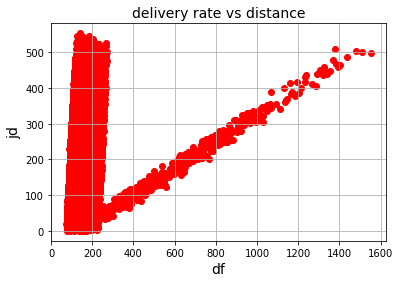

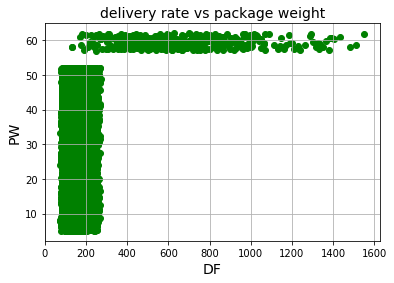

In [48]:
plt.scatter(df['Delivery Fare'], df['Journey Distance'], color='red')
plt.title('delivery rate vs distance', fontsize=14)
plt.xlabel('df', fontsize=14)
plt.ylabel('jd', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Delivery Fare'], df['Package Weight'], color='green')
plt.title('delivery rate vs package weight', fontsize=14)
plt.xlabel('DF', fontsize=14)
plt.ylabel('PW', fontsize=14)
plt.grid(True)
plt.show()

- splitting and predicting the values using test_train_split
- creating test cases
- plotting the graph
- references tutorials

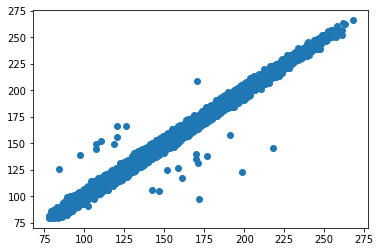

In [49]:
m1 = df[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "tr_p", "Delivery Fare"]][df["Package Weight"] < 45]
m2 = m1.copy()
m2.dropna(subset=['Delivery Fare'], axis=0, inplace=True)

x_train, x_test, y_train, y_test= train_test_split(m2.iloc[:,:-1], m2.iloc[:,-1:], random_state=200)
lm_for_impute = LinearRegression()
lm_for_impute.fit(x_train, y_train)
lm_for_impute.score(x_test, y_test)
y_pred = lm_for_impute.predict(x_test)
mean_squared_error(y_test, y_pred)
plt.scatter(y_test,y_pred)


In [50]:
print("R-square:",lm_for_impute.score(x_test, y_test))

R-square: 0.9891080115874541


In [51]:
df[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "tr_p"]]
df["fare_lr_val"] = lm_for_impute.predict(df[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "tr_p"]])
df["res"] = (df["fare_lr_val"]- df["Delivery Fare"])**2

In [52]:
temp_df = df[df["Package Weight"]<45]["res"].sort_values(ascending=False).head(40)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35328 entries, 0 to 35327
Data columns (total 19 columns):
Id                       35328 non-null object
Drone Type               35328 non-null float64
Post Type                35328 non-null float64
Package Weight           35328 non-null float64
Origin Region            35328 non-null float64
Destination Region       35328 non-null float64
Origin Latitude          35328 non-null float64
Origin Longitude         35328 non-null float64
Destination Latitude     35328 non-null float64
Destination Longitude    35328 non-null float64
Journey Distance         35328 non-null float64
Departure Date           35328 non-null object
Departure Time           35328 non-null object
Travel Time              35328 non-null float64
Delivery Time            35328 non-null object
Delivery Fare            35298 non-null float64
tr_p                     35328 non-null int64
fare_lr_val              35328 non-null float64
res                      35298 no

In [54]:
inds =df[df['Delivery Fare'].isnull()].index.tolist()

In [55]:
len(inds)

30

In [56]:
co=0
for i in inds:
    co+=1
    df["Delivery Fare"][i]=df['fare_lr_val'][i]
co    

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


30

- again checking for nulls

In [57]:
inds =df[df['Delivery Fare'].isnull()].index.tolist()
len(inds)

0


- Dropping the unnecessiary columns 

In [58]:
df.drop(['tr_p', 'fare_lr_val','res'], axis=1, inplace=True) #dropping unnecessiary data

In [59]:
df

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1796901771,2.0,0.0,23.969,9.0,28.0,-38.719660,145.672977,-38.479449,143.707491,173.066,2018-06-20,02:59:35,174.02,5:53:36,163.06
1,ID1611406588,2.0,0.0,14.066,10.0,16.0,-38.360618,147.066718,-37.818610,144.312552,248.715,2018-05-05,22:19:10,247.22,2:26:23,172.89
2,ID5941688071,2.0,1.0,6.601,7.0,19.0,-38.057591,145.139777,-36.921816,144.668385,133.110,2018-04-05,18:59:17,135.35,21:14:37,175.04
3,ID1132498967,3.0,0.0,19.985,13.0,14.0,-38.856844,144.203487,-38.023494,148.373488,375.191,2018-07-09,18:25:50,347.67,0:13:30,199.73
4,ID1355699258,3.0,0.0,39.859,7.0,2.0,-38.145103,145.106314,-37.998439,147.239113,187.611,2018-01-21,21:07:41,177.15,0:04:50,200.05
5,ID1132063008,3.0,0.0,6.438,29.0,46.0,-37.262837,148.136235,-38.570503,146.070017,232.613,2018-05-23,01:46:50,218.06,5:24:53,203.82
6,ID5650171070,1.0,1.0,34.054,34.0,9.0,-37.102627,143.581752,-38.847602,145.734979,270.964,2018-03-17,15:09:02,277.55,19:46:35,154.48
7,ID1807672339,1.0,0.0,39.477,33.0,11.0,-37.507885,146.672199,-37.490127,143.349394,293.445,2018-05-27,05:49:39,300.03,10:49:40,136.19
8,ID1906657399,1.0,0.0,61.913,8.0,32.0,-36.673695,145.373660,-38.905718,143.243050,311.207,2018-04-10,04:50:00,317.79,10:07:47,974.41
9,ID1413237898,3.0,0.0,23.111,35.0,23.0,-36.725471,146.861510,-37.229275,142.867476,359.554,2018-07-21,16:43:21,333.46,22:16:48,202.81


In [60]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35328 entries, 0 to 35327
Data columns (total 16 columns):
Id                       35328 non-null object
Drone Type               35328 non-null float64
Post Type                35328 non-null float64
Package Weight           35328 non-null float64
Origin Region            35328 non-null float64
Destination Region       35328 non-null float64
Origin Latitude          35328 non-null float64
Origin Longitude         35328 non-null float64
Destination Latitude     35328 non-null float64
Destination Longitude    35328 non-null float64
Journey Distance         35328 non-null float64
Departure Date           35328 non-null object
Departure Time           35328 non-null object
Travel Time              35328 non-null float64
Delivery Time            35328 non-null object
Delivery Fare            35328 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.8+ MB


In [61]:
df.to_csv('29520762_solution.csv',index=False) #saving into csv file 